In [1]:
%matplotlib widget

In [2]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

### Load lattice

In [3]:
env = xt.Environment()
env.call('../fccee_z_lattice.py')

### Load quad strength matchs so far

In [4]:
env.vars.load_json('strengths_quads_00_arc_cell.json')
env.vars.load_json('strengths_quads_01_ffccsyl.json')
env.vars.load_json('strengths_quads_02_ffccsxl.json')
env.vars.load_json('strengths_quads_03_ffccsyr.json')
env.vars.load_json('strengths_quads_04_ffccsxr.json')
env.vars.load_json('strengths_quads_05_ffds_lr.json')

### Build an arc

In [5]:
arc_octant = 25 * env['cell_u']
tw_arc = arc_octant.twiss4d()

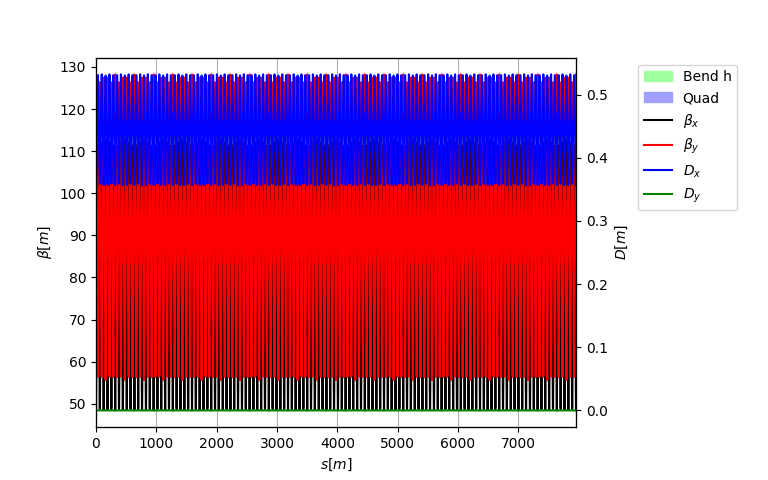

In [6]:
tw_arc.plot()

### Build largr machine sections

In [7]:
experimental_insertion_l =  (env['cell_l3'] + env['cell_uffl'] + env['mark_e_ffl'] + env['ffl'])
experimental_insertion_r = -(env['cell_r3'] + env['cell_uffr'] + env['mark_e_ffr'] + env['ffr'])

line = arc_octant + experimental_insertion_l + experimental_insertion_r + arc_octant

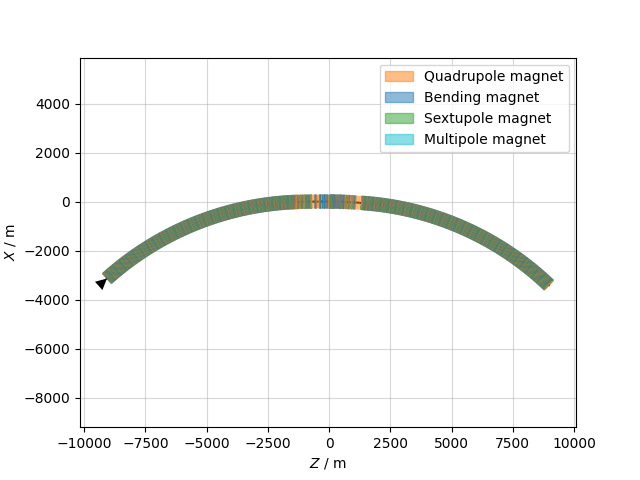

In [8]:
line.survey(element0='ip').plot()

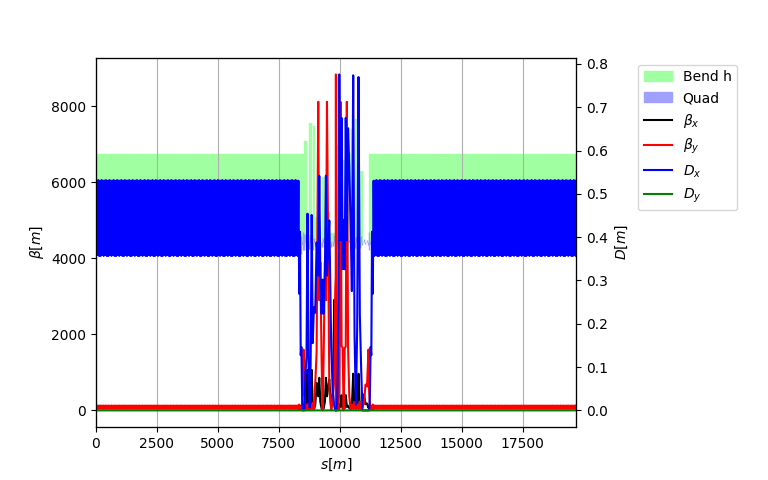

In [9]:
tw = line.twiss(init=tw_arc)
tw.plot()

In [12]:
tw.rows['ip.*'].cols['betx bety dx dpx']

TwissTable: 8 rows, 5 cols
name                betx          bety            dx           dpx
ipimag4::0       19.1385       16.2653     0.0063794      -1.1e-05
ipimag3::0       25.5228       13.9077      0.235652    0.00434419
ipimag2::0       63.6268        1.2821         0.302    1.1294e-06
ip::0                0.1        0.0007   2.86897e-11   1.40811e-10
ip::1                0.1        0.0007   2.86897e-11   1.40811e-10
ipimag2::1          42.8       1.15192          0.44   1.01217e-11
ipimag3::1       60.0661       19.9027      0.442015   -0.00607574
ipimag4::1       34.7178       33.1875     0.0125965      -1.1e-05

In [11]:
line.get_table().rows['ip.*']

Table: 8 rows, 11 cols
name                   s element_type isthick isreplica parent_name iscollective       s_start ...
ipimag4::0        8763.2 Marker         False     False None               False        8763.2
ipimag3::0       8937.06 Marker         False     False None               False       8937.06
ipimag2::0       9296.33 Marker         False     False None               False       9296.33
ip::0            9846.06 Marker         False     False None               False       9846.06
ip::1            9846.06 Marker         False     False None               False       9846.06
ipimag2::1       10159.6 Marker         False     False None               False       10159.6
ipimag3::1       10443.3 Marker         False     False None               False       10443.3
ipimag4::1       10659.9 Marker         False     False None               False       10659.9